## Import

In [1]:
import os
import json
import cv2 as cv
import glob
from collections import Counter
import datasets
from datasets import Dataset
import matplotlib.pyplot as plt

DATA_PATH = "data"

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Verify Integrity

In [2]:
dirs = [dir for dir in os.listdir(DATA_PATH)]
def gen(dirs) :
    for idx, dir in enumerate(dirs) :
        print(f"dir is {dir}")
        with open(f"data/{dir}/{dir}.json", "r") as f:
            meta_data = json.loads(f.read())
        with open(f"data/{dir}/qa_{dir}.json", "r") as f :
            qas =  json.loads(f.read())
        
        img_names = glob.glob(f"data/{dir}/*.jpg")

        d = {"id": int(meta_data["id"]),
            "presentation_url": meta_data["presentation_url"],
            "title": meta_data["title"],
            "author": meta_data["author"],
            "date": meta_data["date"], #AAAA-MM-JJ
            "len": meta_data["len"],
            "description": meta_data["description"],
            "lang": meta_data["lang"],
            "dim": list(meta_data["dim"].values()),
            "like": int(meta_data["like"]),
            "view": int(meta_data["view"]),
            "transcript": meta_data["transcript"],
            "most_read": meta_data["mostRead"],
            "images": img_names,
            "questions/answers": qas
            }
        yield d

In [3]:
for dir in dirs : 
    gen(dirs)

## Construct Dataset object

In [4]:
dataset = datasets.load_dataset("FrenchSlidesQA.py", trust_remote_code=True)

Repo card metadata block was not found. Setting CardData to empty.


Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
dataset["train"]["questions/answers"][0]["question"]

["Quel est l'objectif principal des ajustements ?",
 'Quels sont les deux principaux processus qui ont été mis en œuvre dans un contexte donné ?',
 "Quel est l'objectif principal de l'apprentissage du langage, selon la slide ?",
 "Quels sont les domaines d'apprentissage qui composent les normes en matière d'éducation linguistique ?",
 "Quel est le niveau d'éducation auquel correspondent les élèves âgés de 8 à 9 ans ?",
 'Quelles sont les compétences communicatives essentielles pour utiliser le langage de manière efficace ?',
 'Quels sont les deux principaux ajustements apportés aux pratiques en secondaire ?',
 "Quelles sont les trois étapes pour la publication d'un conte au journal scolaire ?",
 "Quels sont les objectifs d'une pratique sociale du langage qui consiste à exposer les résultats d'une investigation ?",
 'En deuxième année de secondaire, quelles sont les tâches que les élèves doivent réaliser en littérature ?',
 "Quel est l'objectif final d'un projet qui vise à développer la

In [6]:
df = dataset["train"].to_pandas()
df.head(20)

,id,presentation_url,title,author,date,len,description,lang,dim,like,view,transcript,most_read,images,questions/answers
0,13383346,https://es.slideshare.net/slideshow/espaol-133...,Español,jdelarasilva,2012-06-19,19,Los documentos describen los ajustes realizado...,es,"[540, 720]",0,1300,[PROCESO DE ARTICULACIÓN\nCURRICULAR Y AJUSTES...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'bytes': None, 'path': 'data\13383346\slide_...",{'question': ['Quel est l'objectif principal d...
1,15167041,https://es.slideshare.net/slideshow/alfabeto-e...,Alfabeto español,irukina,2012-11-13,5,El documento describe las letras del alfabeto ...,es,"[540, 720]",0,926,"[ALFABETO ESPAÑOL\n , , Vocales\n Por...","[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]","[{'bytes': None, 'path': 'data\15167041\slide_...",{'question': ['Comment dit-on la lettre 'G' en...
2,16536478,https://es.slideshare.net/slideshow/enlace-1es...,evaluación español,SecundariaTecnica23,2013-02-14,7,Este documento parece ser una evaluación de ti...,es,"[792, 612]",3,4959,[]:: EVALUACION TIPO ENLACE ]:: LAS LAJA...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'bytes': None, 'path': 'data\16536478\slide_...",{'question': ['Quel est le sujet principal abo...
3,16536510,https://es.slideshare.net/slideshow/enlace-2es...,evaluación español segundo grado,SecundariaTecnica23,2013-02-14,7,Este documento presenta 30 preguntas de opción...,es,"[1008, 612]",7,52761,[]:: EVALUACION TIPO ENLACE ]:...,"[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]","[{'bytes': None, 'path': 'data\16536510\slide_...",{'question': ['Quels sont les quatre étapes à ...
4,17491264,https://es.slideshare.net/slideshow/el-origen-...,El origen del español,amalia79,2013-03-22,14,Este documento resume la evolución del español...,es,"[540, 720]",4,7031,[EL ORIGEN Y LA\nEVOLUCIÓN DEL ESPAÑOL\n\n\n\n...,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[{'bytes': None, 'path': 'data\17491264\slide_...",{'question': ['Quelles sont les différentes la...
5,18701372,https://es.slideshare.net/slideshow/espaol-187...,Español,Majeriosandrade,2013-04-12,0,Este plan de clase propone una lección de espa...,es,"[792, 612]",0,145,[ESCUELA NORMAL DEL ESTADO DE SONORA\n ...,[0],[],"{'question': [], 'answer': []}"
6,20017555,https://es.slideshare.net/slideshow/el-espaol-...,El español hoy,saira.m,2013-04-26,1,El documento discute el estado actual y el pot...,es,"[842, 595]",0,957,"[‘Excusez-moi’, deje sitio al español\nLa puja...","[0, 0, 0, 0]","[{'bytes': None, 'path': 'data\20017555\slide_...",{'question': ['Quelle est la position de l'esp...
7,21217246,https://es.slideshare.net/slideshow/caso-espao...,Caso español,Talia22reyes,2013-05-15,1,El documento resume la evolución del sistema e...,es,"[842, 595]",0,183,[1\nAsignatura: Tendencias Contemporáneas de l...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'bytes': None, 'path': 'data\21217246\slide_...",{'question': ['Quelles étaient les principales...
8,21218166,https://es.slideshare.net/slideshow/caso-espao...,Caso español,Talia22reyes,2013-05-15,0,El documento resume la evolución del sistema e...,es,"[842, 595]",0,211,[1\nAsignatura: Tendencias Contemporáneas de l...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],"{'question': [], 'answer': []}"
9,21751902,https://es.slideshare.net/slideshow/rap-espaol...,rap español,alvarocorreal,2013-05-23,4,El documento resume los tres mejores discos de...,es,"[595, 794]",0,333,"[ \nRAP\nESPAÑOL\n , \n¿QUE ES EL RAP?\nE...","[0, 1, 0, 1, 0, 0, 0]","[{'bytes': None, 'path': 'data\21751902\slide_...",{'question': ['Quels sont les trois albums les...


## Statistic analysis

In [260]:
view_freqs= Counter(df["view"]).most_common()
len_freqs = Counter(df["len"]).most_common()
like_freqs = Counter(df["like"]).most_common()
date_freqs = Counter(df["date"].apply(lambda date: int(date[:4]))).most_common()
features_freqs = {0: view_freqs, 1: len_freqs, 2: like_freqs, 3: date_freqs}

In [261]:
def plot(name, bins, filter=None):
    size = 2 if filter else 1
    fig,axes=plt.subplots(1,size, figsize=(20,7))
    fig.suptitle(f"Distribution of {name}")

    if not filter : axes = [axes]
    #axes[0].scatter(range(len(df[f"{name}"])), df[f"{name}"], label=f"nb of {name}")
    #axes[0].axhline(y=df[f"{name}"].mean(), color="r", label="mean")
    #axes[0].axhline(y=df[f"{name}"].quantile(0.25), color="g", label="Q1")
    #axes[0].axhline(y=df[f"{name}"].quantile(0.75), color="y", label="Q3")
    axes[0].hist(df[f"{name}"], bins=bins, label=f"nb of {name}")
    axes[0].set_title(f"Nb of {name}", fontsize=13)
    axes[0].set_xticks(bins)
    axes[0].set_xticklabels(bins, rotation=70)
    axes[0].set_xlabel(f"{name}", fontsize=13)
    axes[0].set_ylabel(f"frequency", fontsize=13)
    axes[0].legend()

    if filter :
        views_without_outliers = df[f"{name}"][df[f"{name}"]<int(filter)]
        axes[1].scatter(range(len(views_without_outliers)), views_without_outliers, label=f"nb of {name}")
        axes[1].axhline(y=views_without_outliers.mean(), color="r", label="mean")
        axes[1].axhline(y=views_without_outliers.quantile(0.25), color="g", label= "Q1")
        axes[1].axhline(y=views_without_outliers.quantile(0.75), color="y", label="Q3")
        axes[1].set_ylim((0,int(filter)))
        axes[1].set_title(f"Nb of {name} without outliers")
        axes[1].set_xlabel("n° of the slideshow")
        axes[1].set_ylabel(f"nb of {name}s")
        axes[1].legend()

    plt.show()
    print()

Distribution of views

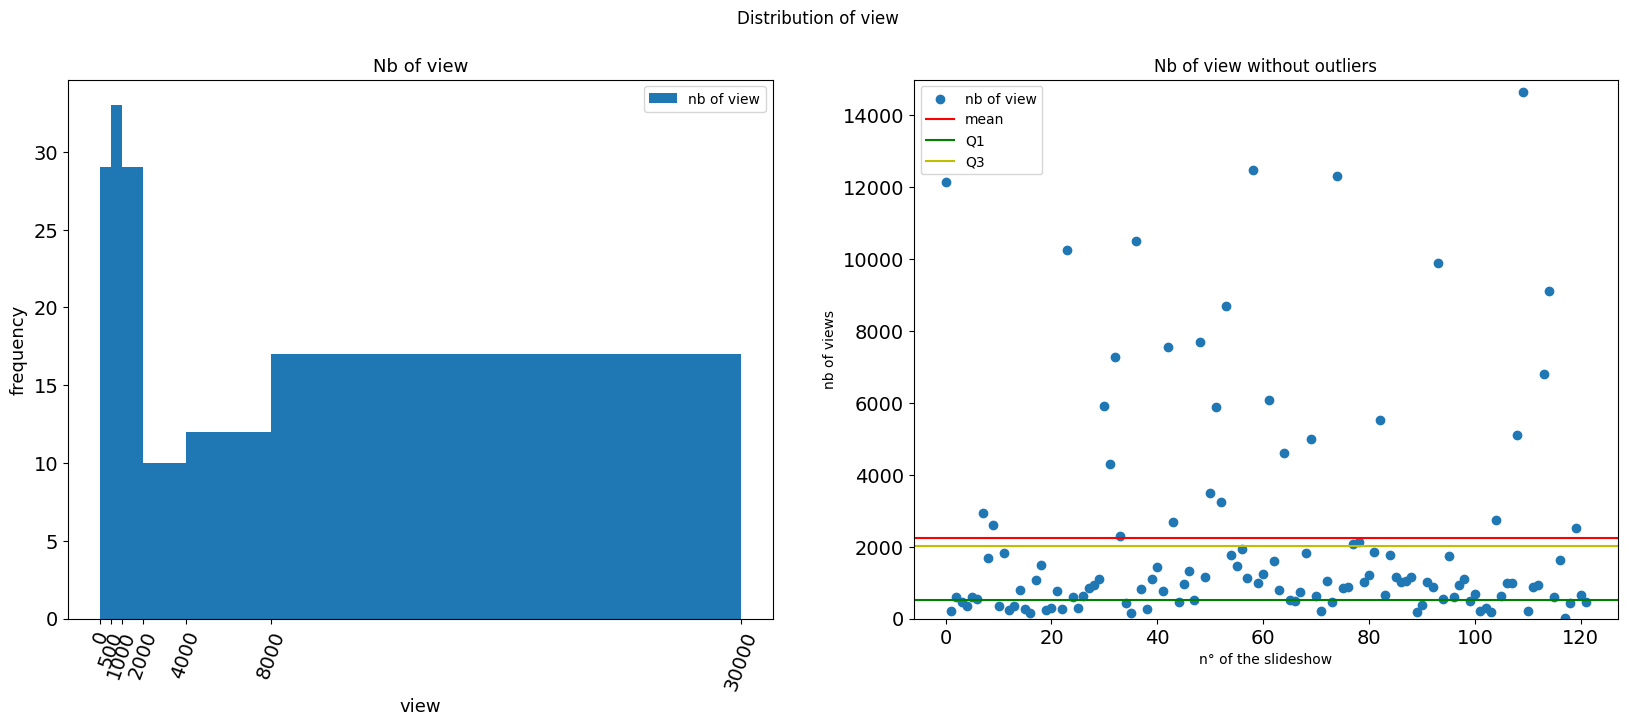

In [262]:
plot("view", [0, 500, 1000, 2000, 4000, 8000, 30000], 15000)

Distribution of size of the slideshow

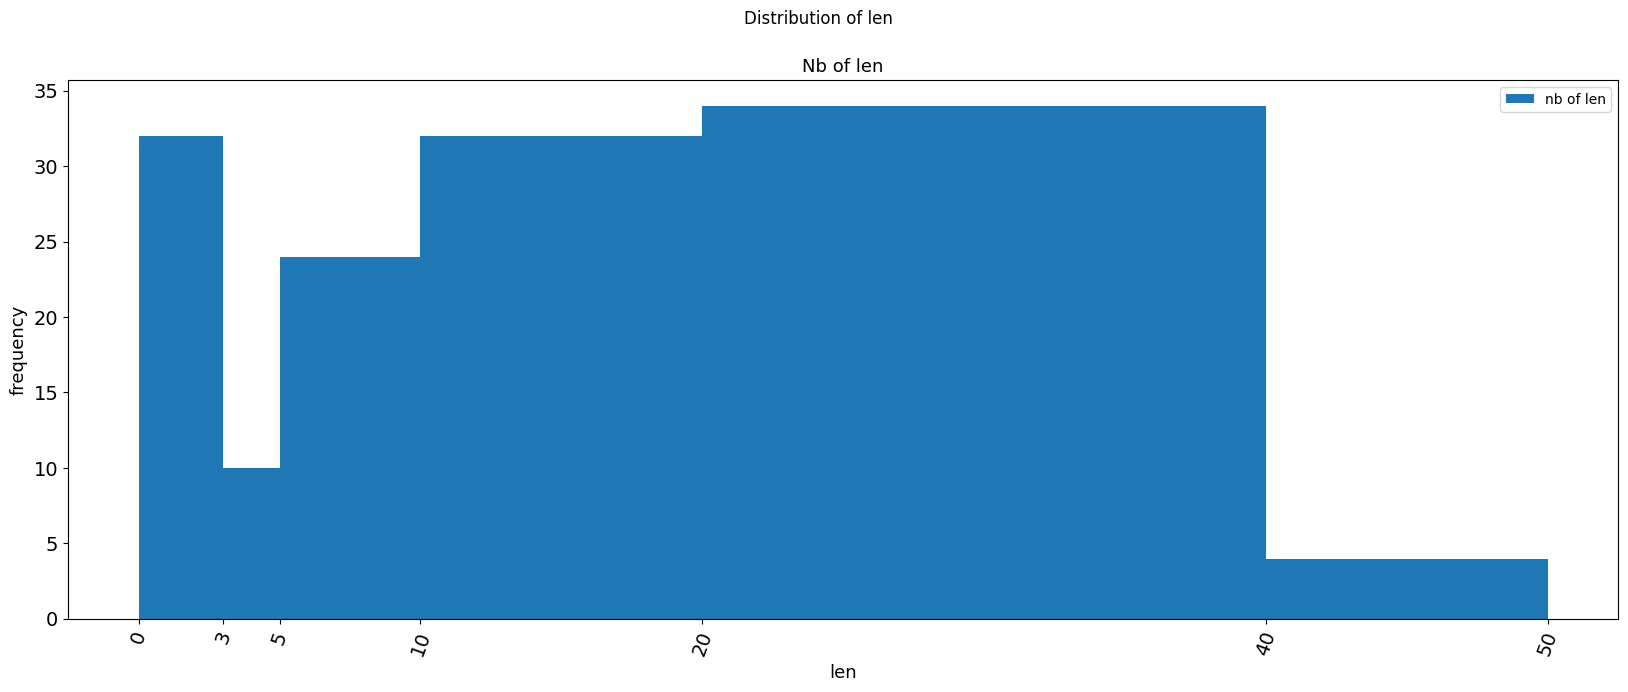

In [263]:
plot("len", [0,3,5,10,20,40,50])

Distribution of likes :

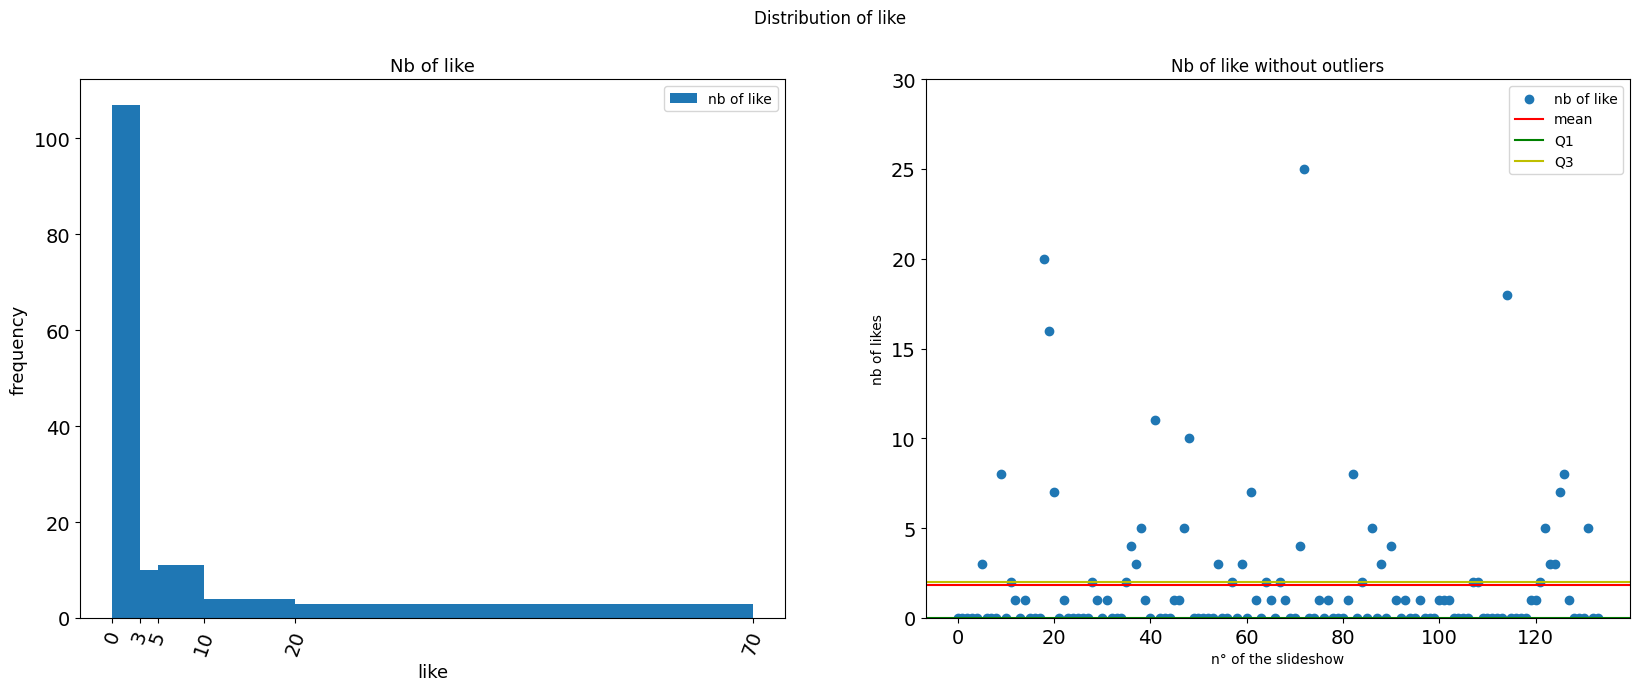

In [264]:
plot("like", [0,3,5,10,20,70], 30)

In [265]:
question_lengths = []
answer_lengths = []
for pair in dataset["train"]["questions/answers"] :
    questions = pair["question"]
    answers = pair["answer"]
    for question, answer in zip(questions, answers) :
        question_lengths.append(len(question))
        answer_lengths.append(len(answer))

KeyError: '[107, 127, 113, 125, 110, 116, 161, 184, 98, 73, 48, 68, 94, 78, 57, 31, 42, 98, 83, 63, 105, 79, 79, 80, 65, 39, 122, 97, 132, 52, 113, 105, 89, 83, 123, 116, 45, 98, 79, 30, 83, 52, 114, 96, 79, 135, 82, 51, 124, 87, 94, 88, 101, 119, 107, 80, 187, 161, 97, 173, 158, 110, 157, 241, 155, 199, 58, 166, 97, 106, 41, 75, 72, 96, 89, 81, 49, 50, 43, 111, 43, 26, 98, 104, 117, 71, 100, 121, 81, 115, 75, 80, 119, 104, 114, 149, 83, 93, 71, 84, 49, 74, 45, 121, 82, 81, 110, 40, 81, 89, 73, 61, 109, 34, 100, 54, 141, 66, 86, 59, 155, 105, 55, 58, 71, 95, 55, 83, 89, 19, 37, 21, 62, 39, 91, 36, 69, 98, 103, 102, 56, 88, 71, 36, 49, 101, 87, 71, 64, 106, 100, 83, 75, 108, 84, 58, 90, 43, 49, 91, 62, 68, 84, 84, 61, 89, 25, 72, 60, 97, 61, 67, 109, 46, 102, 68, 65, 126, 52, 79, 94, 70, 85, 139, 59, 58, 75, 100, 47, 107, 95, 71, 51, 73, 55, 47, 75, 85, 92, 104, 60, 74, 78, 67, 103, 81, 114, 47, 114, 66, 105, 72, 72, 72, 101, 88, 76, 115, 121, 114, 125, 169, 93, 89, 94, 58, 112, 102, 199, 127, 147, 116, 186, 107, 74, 59, 114, 95, 97, 121, 189, 96, 195, 89, 114, 109, 71, 64, 50, 141, 59, 64, 122, 48, 39, 71, 66, 97, 149, 118, 92, 96, 105, 81, 55, 113, 60, 87, 125, 102, 89, 94, 81, 33, 120, 36, 74, 78, 78, 40, 70, 79, 102, 66, 106, 71, 98, 114, 111, 132, 92, 109, 102, 101, 76, 104, 71, 74, 115, 106, 120, 121, 115, 94, 83, 87, 115, 110, 131, 101, 68, 78, 107, 151, 91, 39, 39, 133, 87, 56, 111, 48, 101, 84, 115, 93, 131, 68, 111, 77, 154, 208, 173, 123, 164, 142, 217, 144, 179, 172, 117, 120, 130, 192, 144, 101, 183, 152, 130, 140, 63, 92, 60, 48, 43, 54, 53, 48, 104, 94, 71, 85, 87, 72, 114, 86, 115, 86, 67, 62, 32, 55, 95, 47, 85, 71, 94, 59, 53, 57, 46, 62, 64, 102, 98, 55, 38, 67, 63, 82, 73, 64, 94, 87, 38, 55, 103, 77, 73, 79, 49, 55, 111, 74, 69, 38, 87, 107, 90, 68, 77, 72, 85, 61, 102, 73, 104, 131, 100, 113, 144, 130, 144, 108, 97, 144, 138, 138, 70, 90, 100, 91, 86, 73, 117, 131, 216, 176, 154, 148, 80, 45, 63, 73, 52, 71, 96, 57, 114, 95, 72, 72, 76, 76, 47, 89, 45, 68, 104, 84, 59, 63, 75, 66, 75, 74, 92, 150, 119, 126, 177, 80, 71, 40, 38, 69, 63, 97, 99, 74, 100, 69, 107, 46, 89, 141, 92, 110, 103, 105, 97, 111, 78, 108, 88, 93, 92, 95, 87, 85, 72, 55, 87, 189, 71, 105, 78, 108, 179, 34, 90, 51, 109, 75, 92, 108, 77, 64, 72, 48, 64, 115, 82, 91, 92, 140, 87, 81, 105, 95, 100, 80, 79, 77, 66, 95, 61, 105, 45, 88, 75, 68, 65, 77, 89, 86, 71, 84, 134, 83, 87, 140, 121, 101, 107, 131, 146, 155, 112, 145, 86, 68, 77, 78, 87, 130, 127, 141, 161, 127, 202, 81, 56, 100, 173, 92, 101, 120, 138, 156, 105, 130, 110, 131, 141, 161, 80, 139, 103, 160, 118, 157, 111, 162, 100, 146, 114, 165, 127, 143, 135, 180, 106, 135, 106, 131, 122, 167, 253, 145, 174, 97, 145, 158, 76, 84, 54, 82, 78, 59, 108, 52, 73, 126, 73, 107, 94, 56, 76, 55, 49, 88, 59, 106, 37, 42, 134, 64, 95, 83, 66, 49, 51, 134, 68, 66, 64, 83, 82, 188, 46, 56, 57, 57, 110, 82, 69, 80, 49, 67, 20, 56, 60, 60, 61, 40, 60, 35, 35, 41, 38, 75, 60, 65, 36, 77, 52, 35, 18, 61, 39, 72, 46, 68, 55, 81, 51, 45, 29, 38, 72, 52, 40, 43, 51, 60, 75, 66, 76, 33, 68, 52, 38, 38, 36, 65, 42, 36, 87, 61, 51, 71, 68, 91, 47, 56, 64, 81, 74, 86, 61, 91, 69, 81, 59, 72, 103, 110, 114, 124, 112, 129, 118, 150, 165, 139, 129, 121, 126, 62, 50, 75, 39, 86, 58, 50, 48, 61, 37, 67, 103, 90, 62, 106, 111, 173, 124, 69, 141, 111, 104, 123, 171, 187, 183, 169, 46, 64, 113, 130, 72, 84, 88, 84, 68, 80, 118, 95, 101, 64, 101, 120, 102, 109, 152, 137, 107, 139, 78, 88, 125, 102, 73, 73, 75, 101, 74, 79, 38, 104, 79, 80, 95, 111, 67, 82, 48, 118, 97, 103, 79, 76, 94, 66, 93, 128, 66, 87, 78, 102, 110, 69, 183, 58, 48, 112, 97, 44, 136, 114, 82, 86, 105, 111, 121, 135, 138, 155, 103, 217, 118, 56, 44, 40, 38, 55, 149, 64, 58, 88, 87, 61, 91, 40, 58, 111, 60, 110, 169, 85, 120, 88, 68, 101, 126, 145, 118, 109, 89, 121, 131, 76, 141, 113, 130, 69, 156, 116, 131, 79, 81, 121, 125, 150, 151, 185, 186, 135, 147, 135, 159, 200, 155, 228, 65, 89, 82, 92, 63, 102, 66, 85, 106, 119, 107, 104, 79, 119, 79, 86, 88, 129, 98, 116, 97, 73, 121, 58, 72, 104, 80, 90, 79, 69, 59, 57, 95, 88, 116, 82, 56, 69, 90, 119, 72, 109, 144, 67, 108, 118, 116, 132, 192, 235, 94, 174, 129, 114, 164, 173, 90, 67, 86, 80, 95, 103, 110, 193, 171, 128, 147, 132, 137, 145, 82, 29, 28, 40, 44, 60, 75, 82, 30, 103, 49, 66, 45, 140, 71, 72, 85, 51, 39, 48, 94, 89, 56, 73, 72, 47, 84, 89, 32, 116, 66, 66, 91, 93, 96, 61, 73, 52, 67, 73, 89, 99, 66, 77, 72, 71, 66, 71, 69, 73, 78, 67, 81, 102, 72, 95, 49, 82, 67, 61, 75, 61, 89, 125, 109, 84, 115, 157, 92, 150, 117, 129, 107, 125, 81, 89, 101, 66, 176, 165, 135, 154, 152, 126, 151, 116, 138, 74, 74, 141, 86, 98, 69, 57, 73, 45, 61, 60, 54, 99, 98, 56, 40, 70, 73, 75, 61, 50, 87, 90, 37, 88, 55, 91, 102, 65, 129, 121, 72, 99, 78, 56, 55, 55, 64, 78, 105, 96, 63, 78, 93, 92, 88, 60, 102, 90, 92, 102, 111, 81, 99, 73, 51, 108, 70, 95, 80, 99, 67, 86, 51, 90, 103, 73, 63, 60, 61, 77, 96, 70, 66, 53, 54, 45, 65, 63, 70, 71, 95, 99, 71, 111, 104, 93, 130, 89, 85, 104, 100, 126, 71, 123, 106, 65, 68, 93, 79, 89, 104, 93, 95, 112, 92, 96, 89, 60, 65, 72, 92, 140, 92, 85, 142, 72, 108, 71, 110, 83, 121, 64, 135, 73, 83, 94, 106, 148, 125, 78, 73, 60, 80, 100, 96, 57, 97, 108, 84, 47, 75, 66, 79, 91, 103, 76, 59, 149, 112, 117, 87, 97, 105, 90, 98, 99, 118, 121, 122, 54, 80, 104, 104, 54, 155, 125, 101, 125, 97, 93, 158, 79, 124, 21, 43, 40, 58, 121, 85, 49, 59, 81, 74, 61, 133, 152, 128, 137, 145, 134, 138, 67, 43, 143, 145, 126, 120, 177, 127, 226, 86, 40, 45, 57, 44, 45, 91, 68, 55, 63, 35, 69, 54, 74, 77, 90, 99, 125, 107, 131, 170, 81, 129, 133, 94, 160, 130, 131, 125, 53, 49, 59, 63, 68, 60, 57, 70, 85, 109, 92, 133, 89, 98, 102, 108, 148, 115, 121, 119, 59, 65, 125, 145, 157, 91, 76, 96, 43, 68, 106, 132, 92, 108, 85, 80, 95, 82, 127, 167, 143, 138, 181, 173, 192, 198, 132, 131, 205, 129, 162, 123, 87, 132, 145, 110, 112, 75, 147, 239, 184, 75, 76, 77, 74, 59, 26, 110, 152, 81, 99, 42, 33, 76, 77, 36, 46, 92, 84, 40, 43, 45, 55, 70, 61, 54, 55, 71, 90, 142, 56, 73, 80, 52, 50, 102, 67, 33, 138, 61, 93, 52, 109, 80, 104, 110, 172, 78, 94, 137, 94, 113, 120, 134, 144, 81, 101, 128, 40, 52, 40, 65, 29, 38, 61, 72, 68, 86, 94, 125, 76, 96, 119, 145, 93, 161, 161, 122, 80, 126, 63, 114, 63, 120, 94, 139, 88, 78, 74, 135, 136, 139, 178, 93, 101, 120, 128, 176, 78, 47, 154, 123, 96, 94, 109, 105, 100, 116, 155, 113, 63, 36, 92, 107, 63, 49, 87, 57, 79, 82, 106, 75, 76, 45, 38, 108, 98, 56, 55, 111, 58, 68, 101, 75, 106, 58, 70, 71, 87, 60, 44, 139, 37, 135, 70, 57, 82, 78, 82, 133, 52, 82, 65, 78, 98, 57, 55, 82, 62, 125, 122, 112, 93, 97, 88, 99, 96, 66, 71, 68, 82, 133, 84, 77, 75, 121, 100, 113, 238, 52, 88, 101, 86, 96, 69, 80, 103, 51, 75, 71, 126, 110, 59, 45, 93, 99, 45, 77, 53, 37, 81, 71, 51, 112, 106, 61, 85, 58, 97, 75, 130, 234, 40, 99, 66, 52, 52, 85, 53, 159, 81, 78, 100, 64, 116, 112, 88, 99, 97, 93, 51, 85, 86, 100, 97, 110, 101, 67, 86, 102, 58, 79, 89, 109, 68, 83, 89, 75, 87, 80, 81, 86, 71, 46, 85, 72, 53, 89, 98, 80, 94, 91, 50, 70, 113, 145, 120, 98, 110, 109, 104, 127, 87, 74, 40, 87, 40, 72, 81, 82, 41, 84, 229, 55, 91, 69, 85, 64, 72, 79, 29, 45, 121, 88, 62, 41, 85, 75, 107, 117, 88, 117, 99, 130, 111, 219, 144, 107, 108, 80, 112, 182, 178, 146, 137, 63, 144, 105, 143, 54, 95, 95, 40, 99, 126, 140, 135, 114, 95, 93, 41, 121, 136, 139, 188, 123, 79, 124, 108, 169, 97, 117, 80, 117, 99, 140, 128, 152, 113, 124, 156, 52, 114, 143, 141, 164, 168, 62, 120, 97, 163, 53, 93, 51, 99, 67, 63, 62, 74, 43, 121, 100, 40, 105, 85, 70, 102, 94, 78, 68, 141, 85, 86]'

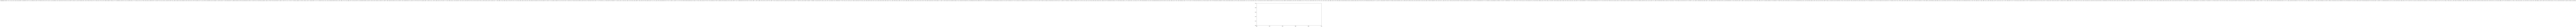

In [253]:
plt.hist(df[f"{name}"], bins=bins, label=f"nb of {name}")
plt.title(f"Nb of {name}", fontsize=13)
plt.xticks(bins)
plt.xticklabels(bins, rotation=70)
plt.xlabel(f"{name}", fontsize=13)
plt.ylabel(f"frequency", fontsize=13)
plt.legend()

## Filters dataset